In [20]:
%load_ext autoreload
%autoreload 2
%run ../draw_functions.py
%run ../kstest.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import numpy as np
from sqlalchemy import text
from sqlalchemy.engine.url import URL
from sqlalchemy import create_engine
import pandas as pd

In [159]:
from utils import setup
df_data2 = setup('sqlmelpjol', r'..\Script_bizarre.sql')

In [160]:
from matplotlib import pyplot as plt
import seaborn as sns

def draw(df, degree=False):
    plt.figure(figsize=(20, 10))

    sns.set(style="whitegrid")


    if degree:
        for batch in df['Batch'].unique():
            df_batch = df[df['Batch'] == batch]
            df_batch = df_batch.sort_values(by='xtime')
            z = np.polyfit(df_batch['xtime'], df_batch['xvalue'], degree)
            p = np.poly1d(z)
            plt.plot(df_batch['xtime'], p(df_batch['xtime']))
    else:
        sns.lineplot(x='xtime', y='xvalue', hue='Sample_Code', data=df, legend=False)

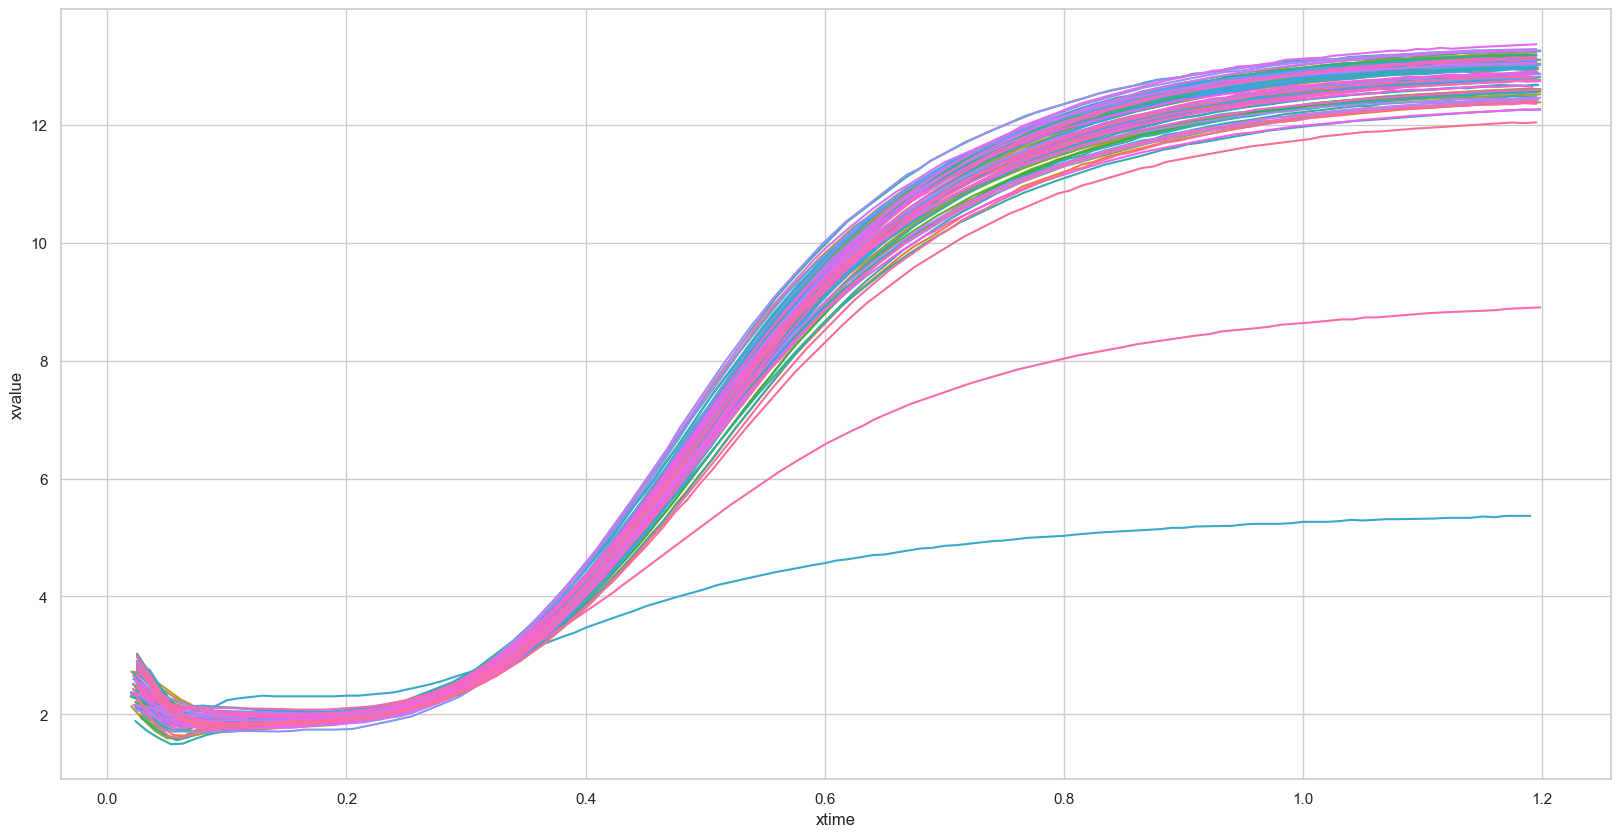

In [161]:
draw(df_data2)

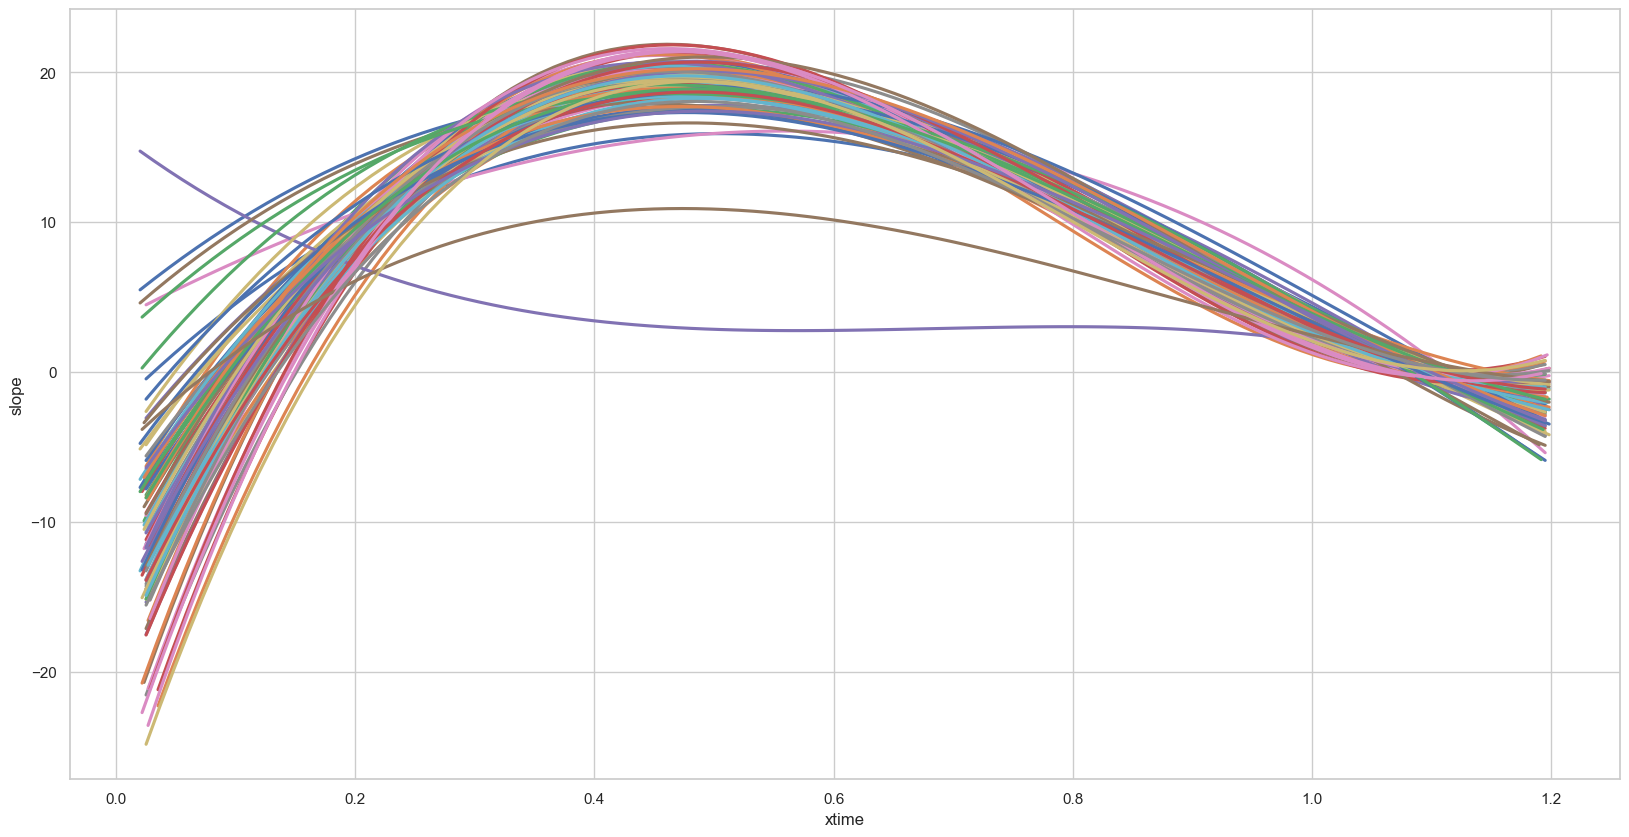

In [162]:
dessiner_commande_slope(df_data2, 3)

In [172]:
from utils import *

df_02_08 = df_data2[(df_data2['xtime'] >= 0.2) & (df_data2['xtime'] <= 0.8)]
df_02_08 = add_fitted_slope(df_02_08)
df_results = df_distance(df_02_08)
df_results

C:\Users\510215\PycharmProjects\Ai_Lab_Project\utils.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fitted_slope'] = np.nan
C:\Users\510215\PycharmProjects\Ai_Lab_Project\utils.py:82: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, df_temp], ignore_index=True)


,OrderNo,Distance
0,MX323123199Q01,6.023495


In [173]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster


max_slope_sample_xtime = df_02_08.loc[df_02_08.groupby('Sample_Code')['fitted_slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']

values = np.array(max_slope_sample_xtime).reshape(-1, 1)
# Générer les liens entre les clusters
linked = linkage(values, 'ward')

# # Utiliser fcluster pour créer des clusters en fonction du nombre de clusters désiré
# clusters = fcluster(linked, 2, criterion='maxclust')
# 
# # supprimer la valeur de values si elle est seul dans clusters
# counts = np.bincount(clusters)
# large_clusters = np.where(counts > 2)[0]
# values = values[np.isin(clusters, large_clusters)]
# 
# linked = linkage(values, 'ward')

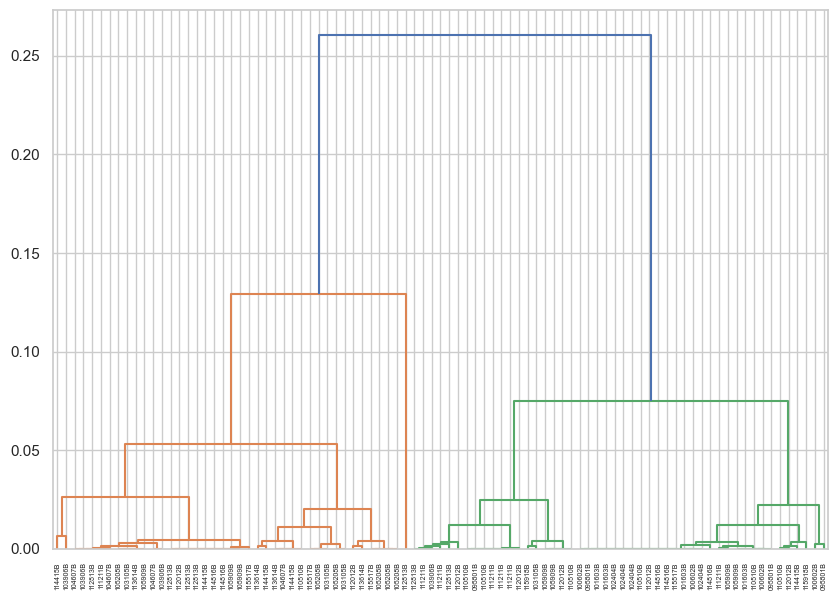

In [174]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=max_slope_sample_xtime.index, distance_sort='descending', show_leaf_counts=True)
plt.show()